# Librería

In [1]:
# Tratamiento de datos
import pandas as pd
import numpy as np
# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
# Modelos
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, \
roc_curve, roc_auc_score, ConfusionMatrixDisplay, multilabel_confusion_matrix

# Data

In [2]:
URL = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic = pd.read_csv(URL)

# Primera Exploración

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
titanic.dropna().describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,183.0,NaN,NaN,NaN,455.36612,247.052476,2.0,263.5,457.0,676.0,890.0
Survived,183.0,NaN,NaN,NaN,0.672131,0.470725,0.0,0.0,1.0,1.0,1.0
Pclass,183.0,NaN,NaN,NaN,1.191257,0.515187,1.0,1.0,1.0,1.0,3.0
Name,183,183,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,183,2,male,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,183.0,NaN,NaN,NaN,35.674426,15.643866,0.92,24.0,36.0,47.5,80.0
SibSp,183.0,NaN,NaN,NaN,0.464481,0.644159,0.0,0.0,0.0,1.0,3.0
Parch,183.0,NaN,NaN,NaN,0.47541,0.754617,0.0,0.0,0.0,1.0,4.0
Ticket,183,127,113760,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,183.0,NaN,NaN,NaN,78.682469,76.347843,0.0,29.7,57.0,90.0,512.3292


In [8]:
def cardinalidad(data):
    '''Funcion para saber la cardinalidad de las varibales que tenemos en el data frame'''
    df_cardin = pd.DataFrame([{
                'variable' : i,
                'tipo_dato' : data[i].dtypes,
                'cantidad_de_nulos' : data[i].isna().sum(),
                'valores_unicos' : data[i].unique(),
                'cardinalidad' : data[i].nunique(),
                'porcentaje_cardinalidad' : (data[i].nunique()/data.shape[0])*100
            } for i in data])
    
    return df_cardin

In [9]:
cardinalidad(titanic)

,variable,tipo_dato,cantidad_de_nulos,valores_unicos,cardinalidad,porcentaje_cardinalidad
0,PassengerId,int64,0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",891,100.000000
1,Survived,int64,0,"[0, 1]",2,0.224467
2,Pclass,int64,0,"[3, 1, 2]",3,0.336700
3,Name,object,0,"[Braund, Mr. Owen Harris, Cumings, Mrs. John B...",891,100.000000
4,Sex,object,0,"[male, female]",2,0.224467
5,Age,float64,177,"[22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0,...",88,9.876543
6,SibSp,int64,0,"[1, 0, 3, 4, 2, 5, 8]",7,0.785634
7,Parch,int64,0,"[0, 1, 2, 5, 3, 4, 6]",7,0.785634
8,Ticket,object,0,"[A/5 21171, PC 17599, STON/O2. 3101282, 113803...",681,76.430976
9,Fare,float64,0,"[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51....",248,27.833895


In [10]:
titanic.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'], axis= 1, inplace=True)

# Mini EDA

In [11]:
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [13]:
df_num = titanic[[ 'Age', 'SibSp','Parch', 'Fare']]

In [14]:
def box_plot_conjunto(data):
    for columna in data.columns:
        print(f"Variable {columna}")
        print(data[columna].describe())
        plt.figure(figsize=(20,4))
        sns.boxplot(data[columna], orient='h')
        media = data[columna].mean()
        mediana = data[columna].median()

        plt.axvline(media, color = 'r', linestyle = 'dashed', linewidth = 1)
        plt.axvline(mediana, color = 'g', linestyle = 'dashed', linewidth = 1)

        plt.show()

Variable Age
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


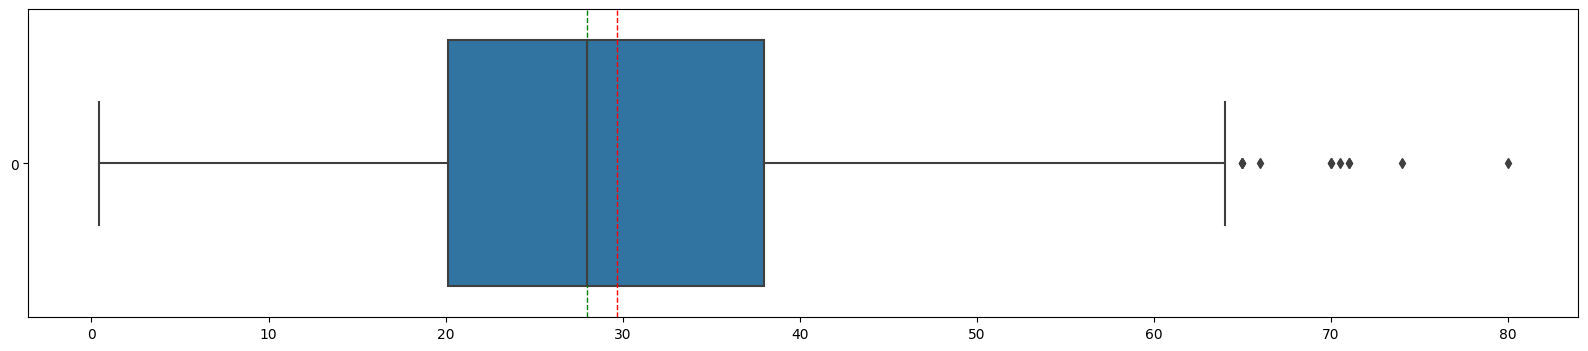

Variable SibSp
count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64


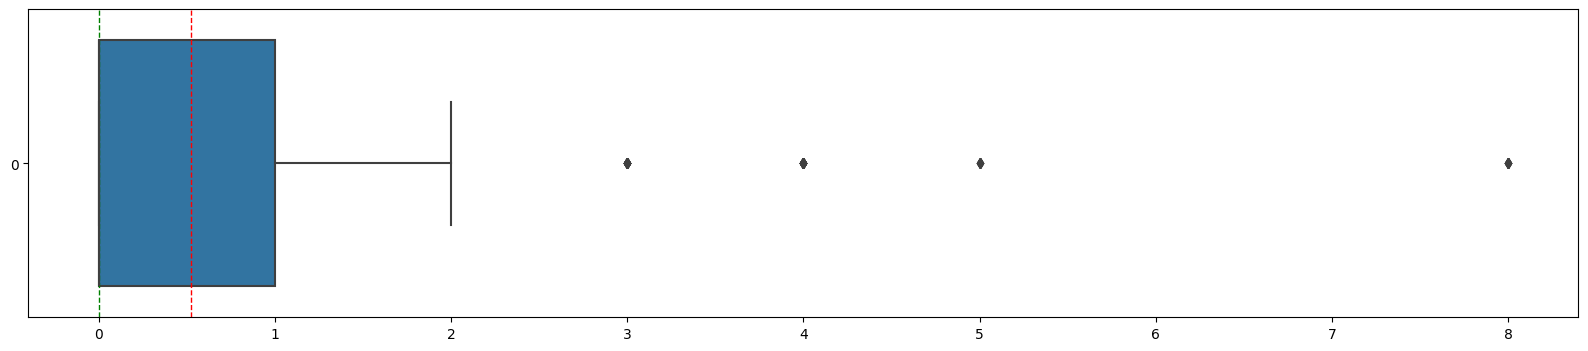

Variable Parch
count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64


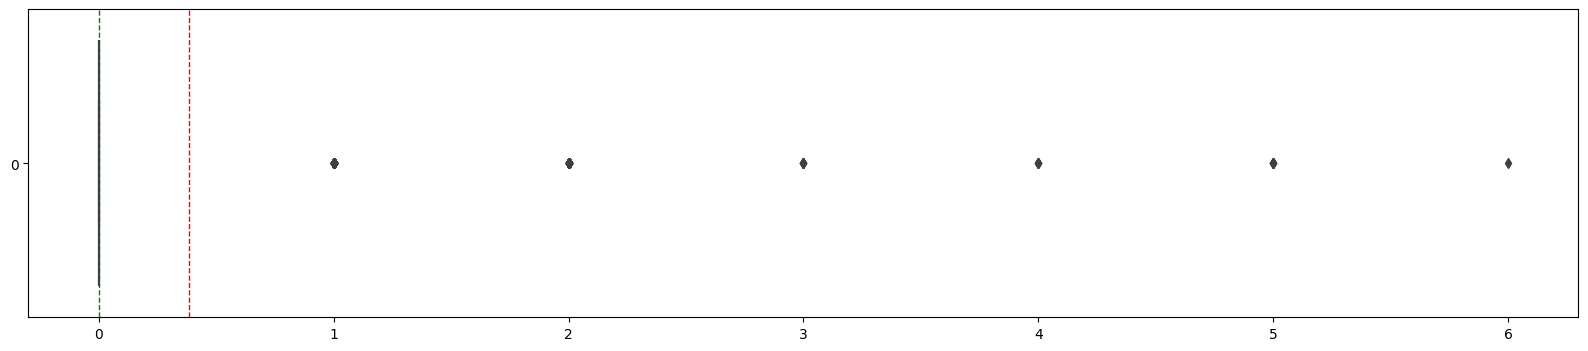

Variable Fare
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


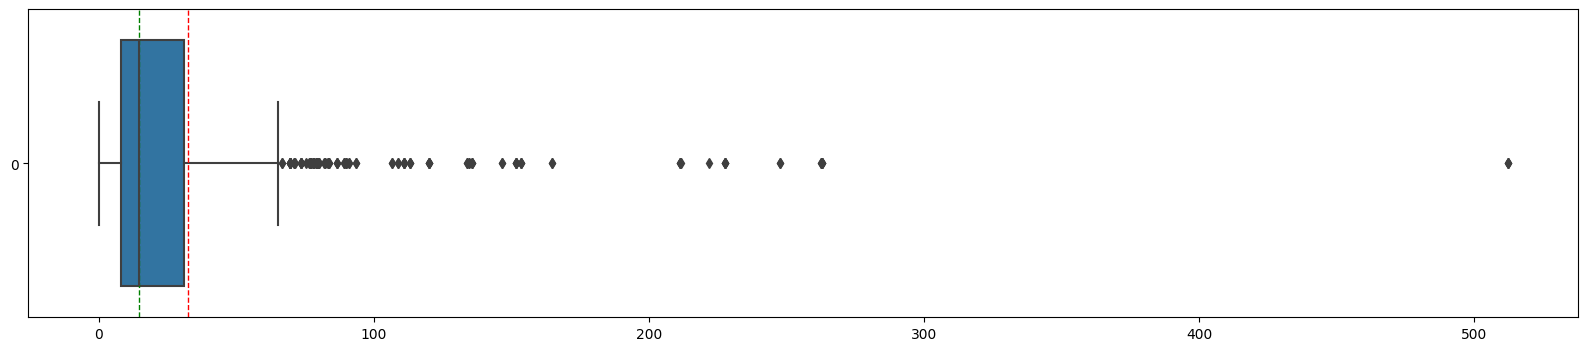

In [15]:
box_plot_conjunto(df_num)

In [16]:
df_cal = titanic[['Survived', 'Pclass', 'Sex', 'SibSp','Parch', 'Embarked']]

In [17]:
def graficos_variables_cualit(data):
    try:
        for columna in data.columns:
            print('--'*50)
            print(f"VARIABLE: {columna}\n")
            if len(data[columna].dropna().unique()) > 1:
                ax = sns.countplot(data= data.sort_values(by=columna), x= columna, palette='husl')
                ax.set_xticklabels(data[columna].sort_values().unique(), rotation=90)
                plt.title(f"Conteo variable {columna}")
                plt.show();
            else:
                print('No es necesario graficar porque tiene un solo valor dentro de la columna')
            print(data[columna].value_counts())
            print('--'*50)
    except Exception as a:
        print(f"No puedo analizar la variable por este error {a}")

----------------------------------------------------------------------------------------------------
VARIABLE: Survived



c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


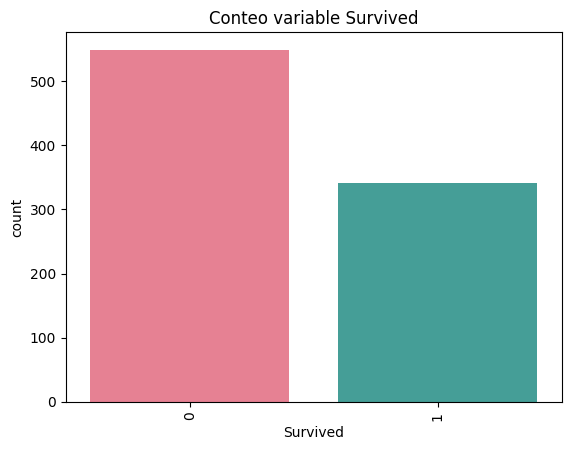

Survived
0    549
1    342
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: Pclass



c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


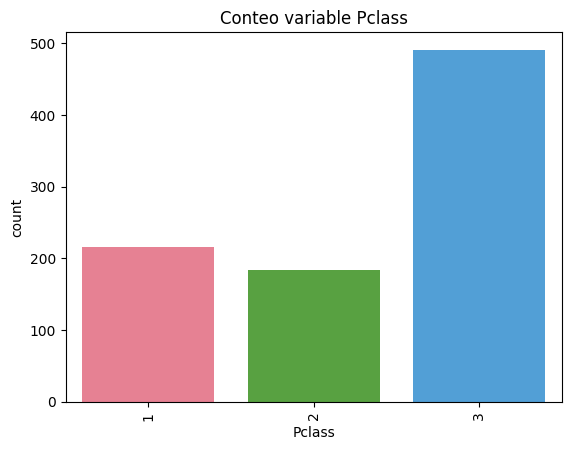

c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Pclass
3    491
1    216
2    184
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: Sex



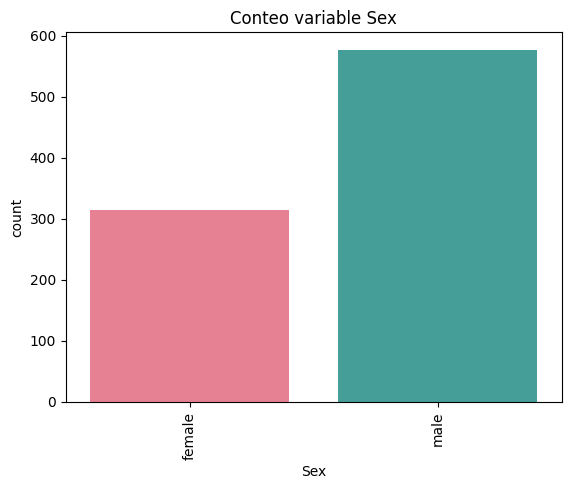

Sex
male      577
female    314
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: SibSp



c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


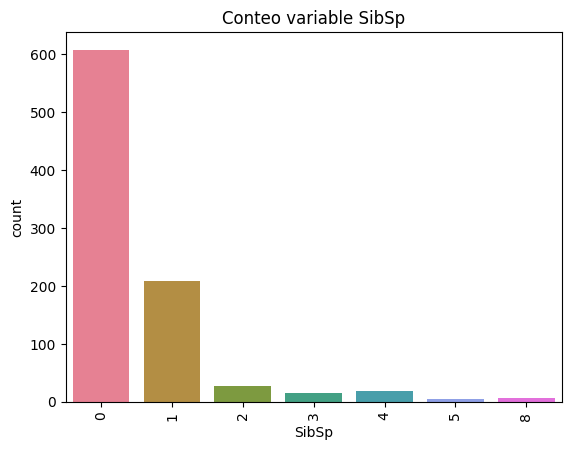

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: Parch



c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


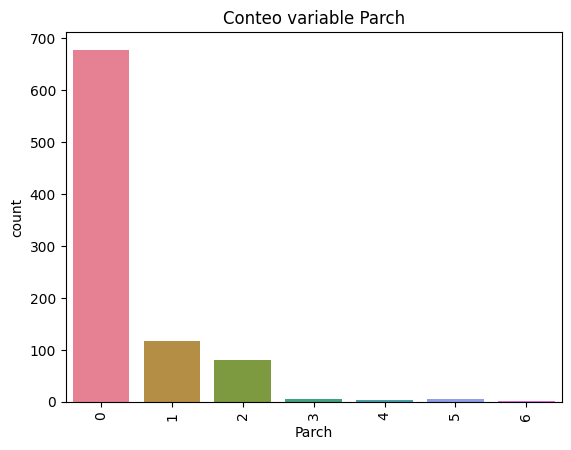

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: Embarked

No puedo analizar la variable por este error The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (4).


c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


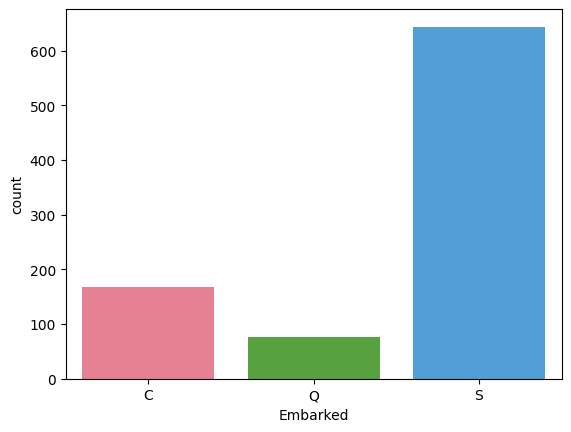

In [18]:
graficos_variables_cualit(df_cal)

In [19]:
titanic.select_dtypes(exclude=object).corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# Tratamiento de missing y valores atípicos

In [20]:
titanic.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [21]:
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

In [22]:
dicc = titanic.sort_values(by='Age').groupby(by=['Pclass', 'Sex'], as_index=False).median(numeric_only=True)[['Age', 'Sex', 'Pclass']].to_dict('records')
dicc

[{'Age': 35.0, 'Sex': 'female', 'Pclass': 1},
 {'Age': 40.0, 'Sex': 'male', 'Pclass': 1},
 {'Age': 28.0, 'Sex': 'female', 'Pclass': 2},
 {'Age': 30.0, 'Sex': 'male', 'Pclass': 2},
 {'Age': 21.5, 'Sex': 'female', 'Pclass': 3},
 {'Age': 25.0, 'Sex': 'male', 'Pclass': 3}]

In [23]:
dicc_1 = {'female': 27.0, 'male': 29.0}

In [24]:
titanic['Age'].fillna(titanic['Sex'].map(dicc_1), inplace=True)

# Feature Engineer

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

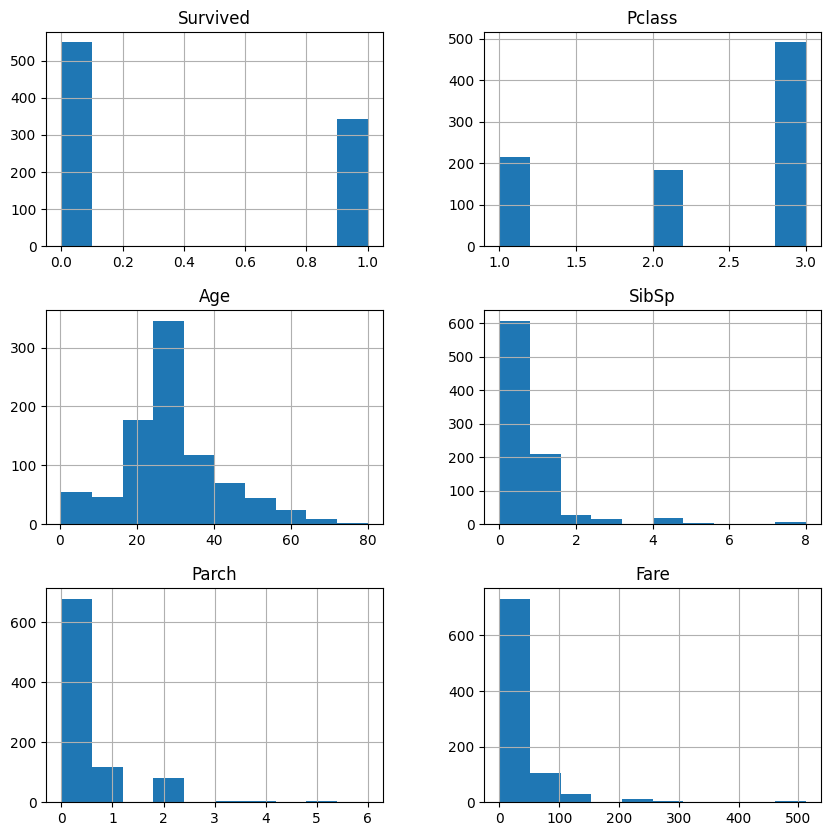

In [26]:
titanic.hist(bins=10, figsize=(10,10))

- Unir las dos columnas de SibSp y Parch si da más de 0 va acompañado
- Imputar a la media de Master que son niños (año)
- Saber si es niño o no

In [ ]:
titanic['']

# División de Datos

# Escalado + Dummies

# Cross-Validation + Base-Lines

# Entrenar

# Predicción

# Validación del modelo